<a href="https://colab.research.google.com/github/prog815/abscur/blob/master/%D0%A2%D1%80%D0%B5%D1%82%D1%8C%D1%8F_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D1%8C_%D0%9F%D1%80%D0%BE%D0%B3%D0%BD%D0%BE%D0%B7_%D0%B7%D0%BD%D0%B0%D0%BA%D0%B0_%D0%BF%D1%80%D0%BE%D1%81%D1%82%D0%BE%D0%B9_%D1%81%D0%B5%D1%82%D1%8C%D1%8E_(abscur).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Третья модель простого прогнозирования знака изменения абсолютных курсов.**

**Проект: Абсолютный курс**

Енин А.В.

г. Оренбург

04.07.2020 г.

Сайт - http://www.abscur.ru

Twitter - https://twitter.com/abscurs

ВКонтакте -  https://vk.com/abscur

Одноклассники -  https://ok.ru/group/53547043520717

FB -  https://www.facebook.com/abscur 

Telegram - https://t.me/AbsCur

GitHub - https://github.com/prog815/abscur_prediction

WhatsUp - https://chat.whatsapp.com/KrNJXAKizPxDlDSjYfdpQs

Viber - https://invite.viber.com/?g2=AQB63y7Cm%2BNJK0tNZW%2F9kI00M6Wr8HuZ7XeamzN4jZCve8Aq9%2FiD3DY56Eqcf7dc

# Подключаем библиотеку

In [ ]:
! pip install git+https://github.com/prog815/abscur

import abscur

  Cloning https://github.com/prog815/abscur to /tmp/pip-req-build-zyn7lnc7
  Running command git clone -q https://github.com/prog815/abscur /tmp/pip-req-build-zyn7lnc7
  Created wheel for abscur: filename=abscur-0.1.22-cp36-none-any.whl size=8947 sha256=3d5194f9f587b10561eece5aadb424628c8d5960ddbb18f03d5a67a857948127
  Stored in directory: /tmp/pip-ephem-wheel-cache-x109k7d7/wheels/57/99/b6/8f8d84361b37a8789f91280c8e92720b9101beffb944cd32ab
Successfully built abscur


# Подгружаем историю абсолютных курсов

In [ ]:
data = abscur.get_abs_curses()

# Преобразуем курсы к относительным изменениям

In [ ]:
d_data = data.pct_change()

# Готовим входы и выходы модели

In [ ]:
WINDOW = 5

inp_d_data = d_data.copy()

for name in d_data.columns:
    for i in range(1,WINDOW+1):
        inp_d_data[name + '_' + str(i)] = d_data[name].shift(i)

inp_d_data.dropna(inplace=True)

out_d_data = inp_d_data[d_data.columns]

out_d_data = (out_d_data > 0.0) * 1.0

inp_d_data.drop(columns=d_data.columns,inplace=True)

In [ ]:
inp_d_data

,AUD_1,AUD_2,AUD_3,AUD_4,AUD_5,CAD_1,CAD_2,CAD_3,CAD_4,CAD_5,HKD_1,HKD_2,HKD_3,HKD_4,HKD_5,JPY_1,JPY_2,JPY_3,JPY_4,JPY_5,SEK_1,SEK_2,SEK_3,SEK_4,SEK_5,USD_1,USD_2,USD_3,USD_4,USD_5,CHF_1,CHF_2,CHF_3,CHF_4,CHF_5,EUR_1,EUR_2,EUR_3,EUR_4,EUR_5,...,QAR_1,QAR_2,QAR_3,QAR_4,QAR_5,RON_1,RON_2,RON_3,RON_4,RON_5,SAR_1,SAR_2,SAR_3,SAR_4,SAR_5,THB_1,THB_2,THB_3,THB_4,THB_5,TRY_1,TRY_2,TRY_3,TRY_4,TRY_5,TWD_1,TWD_2,TWD_3,TWD_4,TWD_5,UAH_1,UAH_2,UAH_3,UAH_4,UAH_5,VND_1,VND_2,VND_3,VND_4,VND_5
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-09-13,-0.010955,-0.000149,-0.001860,0.005800,0.001238,-0.006839,-0.000791,-0.002285,-0.000145,0.002453,0.002916,0.002016,0.000809,-0.006829,-0.002407,0.001617,-0.002465,-0.002469,0.012897,0.001590,-0.002673,0.002440,0.004628,0.003707,-0.000638,0.003268,0.002220,0.000712,-0.006620,-0.002482,-0.000172,-0.000048,0.001065,0.003587,-0.002384,-0.000219,0.004745,-0.000642,0.002270,-0.002993,...,0.003323,0.002165,0.000712,-0.006620,-0.002454,-0.001823,0.005145,0.000484,0.001953,-0.003182,0.005281,0.002246,0.000578,-0.006514,-0.001443,0.002287,-0.001560,-0.000243,-0.002712,-0.005844,-0.001870,-0.004330,-0.003348,0.001404,-0.000856,-0.007485,0.000042,-0.002526,0.004904,0.003444,0.001562,0.003130,-0.001559,-0.001612,-0.005077,0.007296,0.001946,-0.000881,-0.014942,0.006404
2016-09-14,0.003881,-0.010955,-0.000149,-0.001860,0.005800,0.002300,-0.006839,-0.000791,-0.002285,-0.000145,0.000930,0.002916,0.002016,0.000809,-0.006829,0.007778,0.001617,-0.002465,-0.002469,0.012897,0.001604,-0.002673,0.002440,0.004628,0.003707,0.000672,0.003268,0.002220,0.000712,-0.006620,0.004541,-0.000172,-0.000048,0.001065,0.003587,0.001611,-0.000219,0.004745,-0.000642,0.002270,...,0.000617,0.003323,0.002165,0.000712,-0.006620,0.002951,-0.001823,0.005145,0.000484,0.001953,-0.001385,0.005281,0.002246,0.000578,-0.006514,-0.001854,0.002287,-0.001560,-0.000243,-0.002712,0.000268,-0.001870,-0.004330,-0.003348,0.001404,-0.000497,-0.007485,0.000042,-0.002526,0.004904,0.006261,0.001562,0.003130,-0.001559,-0.001612,-0.002014,0.007296,0.001946,-0.000881,-0.014942
2016-09-15,-0.007951,0.003881,-0.010955,-0.000149,-0.001860,-0.004680,0.002300,-0.006839,-0.000791,-0.002285,0.004771,0.000930,0.002916,0.002016,0.000809,-0.002355,0.007778,0.001617,-0.002465,-0.002469,-0.001191,0.001604,-0.002673,0.002440,0.004628,0.004878,0.000672,0.003268,0.002220,0.000712,-0.000634,0.004541,-0.000172,-0.000048,0.001065,0.002951,0.001611,-0.000219,0.004745,-0.000642,...,0.004878,0.000617,0.003323,0.002165,0.000712,0.003178,0.002951,-0.001823,0.005145,0.000484,0.005013,-0.001385,0.005281,0.002246,0.000578,0.003180,-0.001854,0.002287,-0.001560,-0.000243,0.000817,0.000268,-0.001870,-0.004330,-0.003348,0.001526,-0.000497,-0.007485,0.000042,-0.002526,0.015528,0.006261,0.001562,0.003130,-0.001559,0.008228,-0.002014,0.007296,0.001946,-0.000881
2016-09-16,-0.000505,-0.007951,0.003881,-0.010955,-0.000149,-0.004842,-0.004680,0.002300,-0.006839,-0.000791,-0.002082,0.004771,0.000930,0.002916,0.002016,-0.002579,-0.002355,0.007778,0.001617,-0.002465,0.002207,-0.001191,0.001604,-0.002673,0.002440,-0.002135,0.004878,0.000672,0.003268,0.002220,0.001547,-0.000634,0.004541,-0.000172,-0.000048,0.000522,0.002951,0.001611,-0.000219,0.004745,...,-0.002135,0.004878,0.000617,0.003323,0.002165,0.000215,0.003178,0.002951,-0.001823,0.005145,-0.002268,0.005013,-0.001385,0.005281,0.002246,0.000013,0.003180,-0.001854,0.002287,-0.001560,-0.001381,0.000817,0.000268,-0.001870,-0.004330,0.000795,0.001526,-0.000497,-0.007485,0.000042,0.000362,0.015528,0.006261,0.001562,0.003130,-0.003863,0.008228,-0.002014,0.007296,0.001946
2016-09-19,0.002908,-0.000505,-0.007951,0.003881,-0.010955,0.001538,-0.004842,-0.004680,0.002300,-0.006839,-0.001342,-0.002082,0.004771,0.000930,0.002916,0.004107,-0.002579,-0.002355,0.007778,0.001617,0.000793,0.002207,-0.001191,0.001604,-0.002673,-0.001244,-0.002135,0.004878,0.000672,0.003268,0.000835,0.001547,-0.000634,0.004541,-0.000172,-0.001

In [ ]:
out_d_data

,AUD,CAD,HKD,JPY,SEK,USD,CHF,EUR,CNY,CZK,GBP,ILS,NOK,NZD,RUB,SGD,ZAR,AED,ARS,BRL,CLP,COP,DKK,EGP,HUF,IDR,INR,ISK,KRW,KWD,KZT,MXN,MYR,PEN,PHP,PKR,PLN,QAR,RON,SAR,THB,TRY,TWD,UAH,VND
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-09-13,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2016-09-14,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2016-09-15,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
2016-09-16,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2016-09-19,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-29,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
2020-06-30,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
2020-07-01,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0


# Разделяем выборку на обучающую и тестовую

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(inp_d_data.values,out_d_data.values,test_size=0.2,shuffle=False)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((795, 225), (199, 225), (795, 45), (199, 45))

# Готовим модель первоначального шкалирования входов

In [ ]:
from sklearn.preprocessing import StandardScaler

ss_model = StandardScaler()
ss_model.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

# Учим модели для каждой валюты

In [ ]:
import tensorflow as tf
tf.keras.backend.set_floatx('float64')

LR = 1e-4
EPOCHS = 1000

models_cnt  = y_train.shape[1]

models = [0,]*models_cnt

for n in range(models_cnt):

    regul = tf.keras.regularizers.l2(0.1)

    model = tf.keras.Sequential([
        tf.keras.layers.Dense(1000,activation=tf.nn.leaky_relu,name='lev1',kernel_regularizer=regul),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.05),
        tf.keras.layers.Dense(1000,activation=tf.nn.leaky_relu,name='lev2',kernel_regularizer=regul),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.05),
        tf.keras.layers.Dense(1,name='lev3',activation='sigmoid',kernel_regularizer=regul)
    ],name='model')

    opt = tf.keras.optimizers.Adam()
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)

    model.compile(optimizer=opt,loss=loss,metrics=['accuracy'])

    hist = model.fit(ss_model.transform(X_train),y_train[:,n],
                    epochs=EPOCHS,
                    validation_split=0.3,
                    shuffle=True,
                    callbacks=[tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy',factor=0.5,mode='max',),
                                tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',mode='max',patience=50,restore_best_weights=True)],
                    verbose = 0
                    )
    
    models[n] = model
    print(n, d_data.columns[n],
          '- epochs:', len(hist.history['loss']),
          '- loss = ', hist.history['loss'][-1],
          '- val_loss:', hist.history['val_loss'][-1],
          '- accuracy:', hist.history['accuracy'][-1],
          '- val_accuracy:', hist.history['val_accuracy'][-1])


0 AUD - epochs: 97 - loss =  0.5600610187848761 - val_loss: 0.7846309749913444 - accuracy: 0.9586330935251799 - val_accuracy: 0.49372384937238495
1 CAD - epochs: 91 - loss =  0.570922930335334 - val_loss: 0.7807508904550018 - accuracy: 0.9640287769784173 - val_accuracy: 0.502092050209205
2 HKD - epochs: 101 - loss =  0.5586928713981151 - val_loss: 0.7610706801798781 - accuracy: 0.960431654676259 - val_accuracy: 0.5313807531380753


KeyboardInterrupt: ignored

Выводим график обучения последней модели

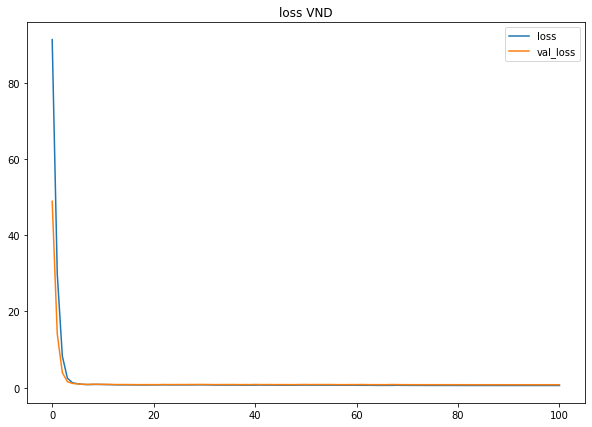

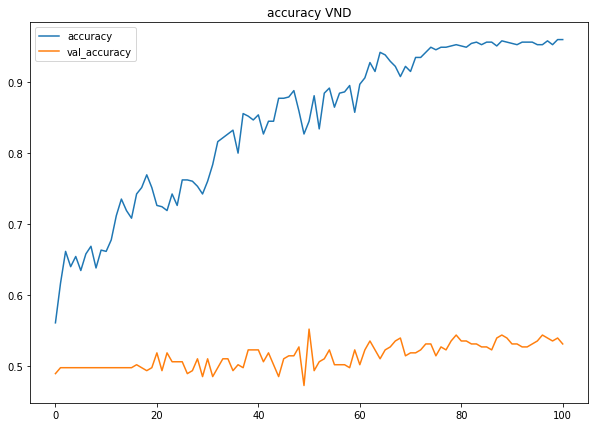

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.plot(hist.history['loss'],label='loss')
plt.plot(hist.history['val_loss'],label='val_loss')
plt.title('loss ' + d_data.columns[-1])
plt.legend()
plt.show()

plt.figure(figsize=(10,7))
plt.plot(hist.history['accuracy'],label='accuracy')
plt.plot(hist.history['val_accuracy'],label='val_accuracy')
plt.title('accuracy ' + d_data.columns[-1])
plt.legend()
plt.show()

# Качество редсказания знака на тестовых данных (по вероятности)

In [ ]:
acc = [models[n].evaluate(ss_model.transform(X_test),y_test[:,n],verbose=0)[1] for n in range(models_cnt)]
plt.figure(figsize=(5,10))
plt.barh(d_data.columns,acc)
plt.title('test accuracy')
plt.show()

AttributeError: ignored

# Разные метрики для модели предсказания первой валюты

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test[:,0],models[0].predict(ss_model.transform(X_test))[:,0]>0.5))

# Выгрузка модели для дальнейшего использования при ежедневных прогнозах во внешней системе

In [ ]:
import json
model2dic = lambda model: {w.name:w.numpy().tolist() for w in model.weights}
with open('simple_model.json','w') as fp:
    fp.write(json.dumps({'prep':{'mean':ss_model.mean_.tolist(),'scale':ss_model.scale_.tolist()},'models':[{'model':model2dic(models[n]),'name':d_data.columns[n]} for n in range(models_cnt)]}))